**CAR PRICE PREDICTION**

In [ ]:
import pandas as  pd

In [ ]:
df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
#print unique value for all categorical features ,if i use .unique method i'll able to get all unique method value for seller type
#how many unique values are thre in unique features

print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['fuel'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [ ]:
#checking missing and null values
#isnull is inbuilt functi

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#mean,median,mode,q1,q2,q3,min,max
df.describe() #i wanna see some details

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
#create a final dataset i'm gonna skip car name beacause many no.pf car names car name may not play good value itself, so selling price 
#and present price playing better,diff car name present based on cae name car we shouldn't judge what should selling price instaed of present price and selling price
final_dataset = df[['year','selling_price','km_driven','fuel','seller_type','transmission','owner']]

In [ ]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
final_dataset['current_year'] = 2020

In [ ]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020


In [ ]:
final_dataset['no_year']=final_dataset['current_year']-final_dataset['year']

In [ ]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [ ]:
final_dataset.drop(['year'],axis=1,inplace=True)
# year column is gone so i used axis method, inplace method is true that particular method operation is done 
# inplace true is particular operation is true,inplace like a permanant operation

In [ ]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [ ]:
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [ ]:
#less no.of categoricalvalues so i'm used dummy variable trap 
#drop_first=True 1st column should also deleted prevent of dummy variable trap
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [ ]:
#dummy variable track just explore this first 2 values is 0,0 that based on the have 3feature so we have use dummy variable 
final_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
#find out correlation function call as corr()
#correlation says how one features correlated into another feature
final_dataset.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [ ]:
import seaborn as sns

**PLOT**

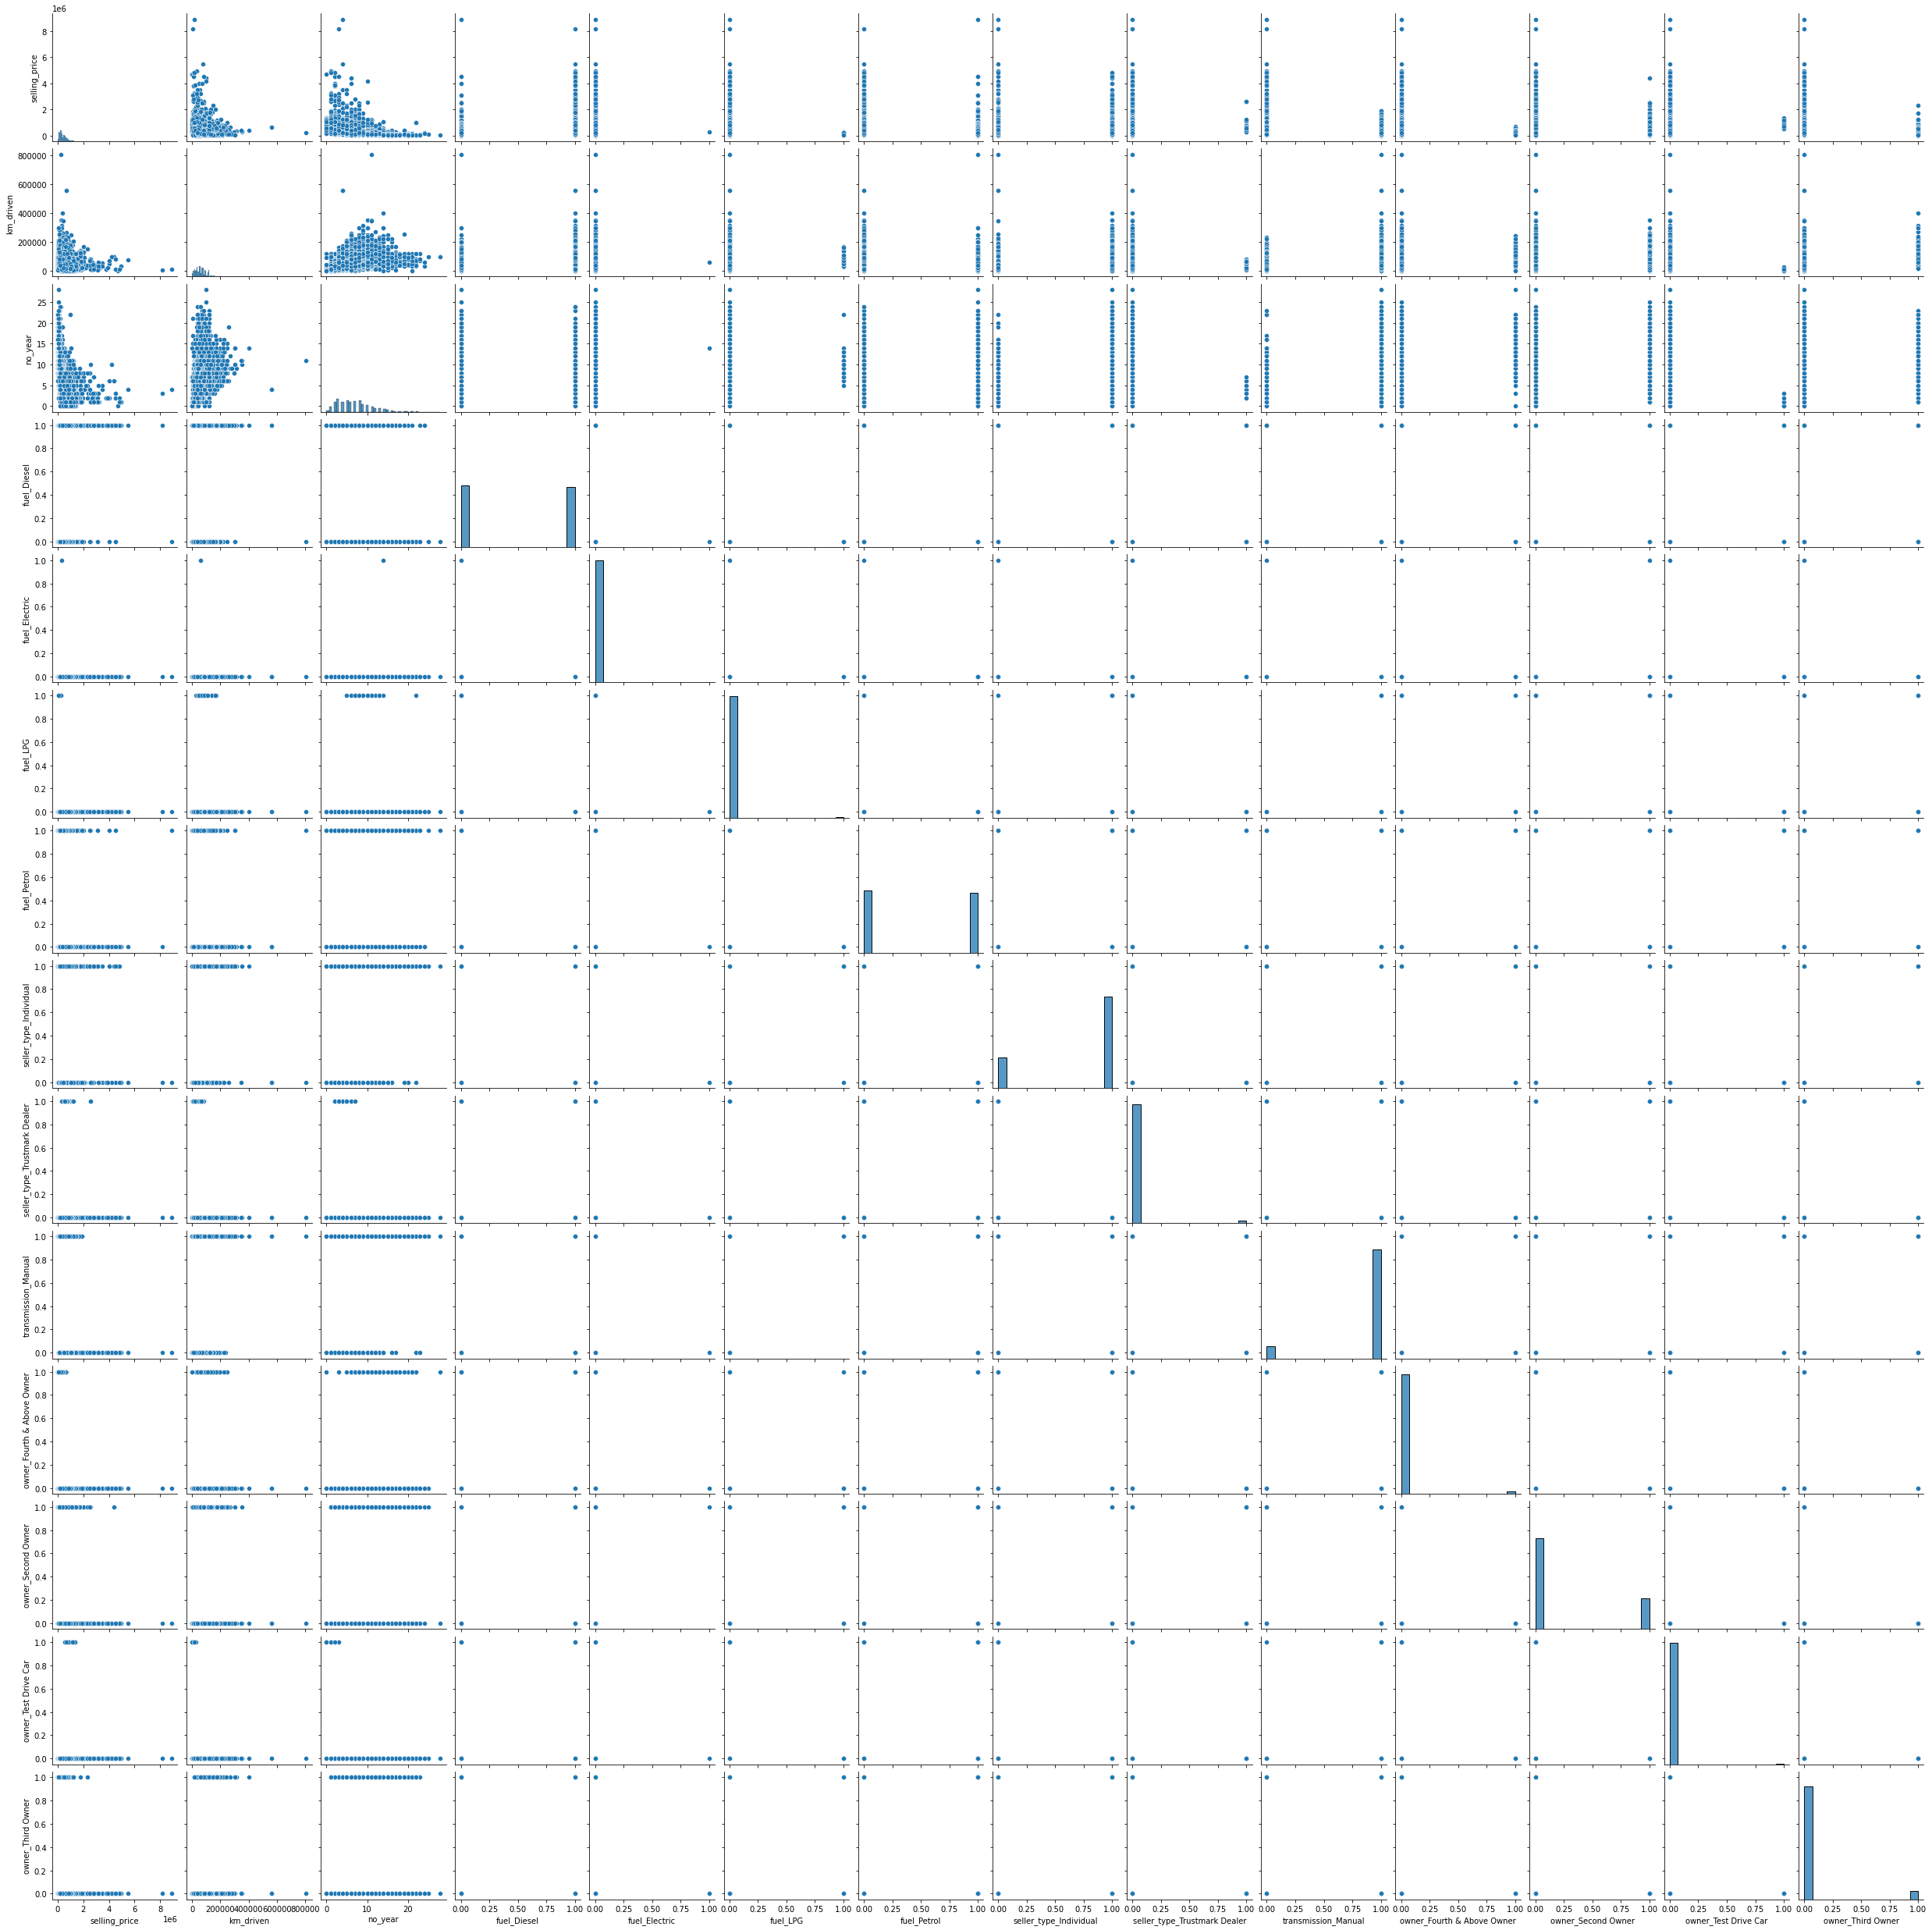

In [ ]:
sns.pairplot(final_dataset)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

**HEATMAP**

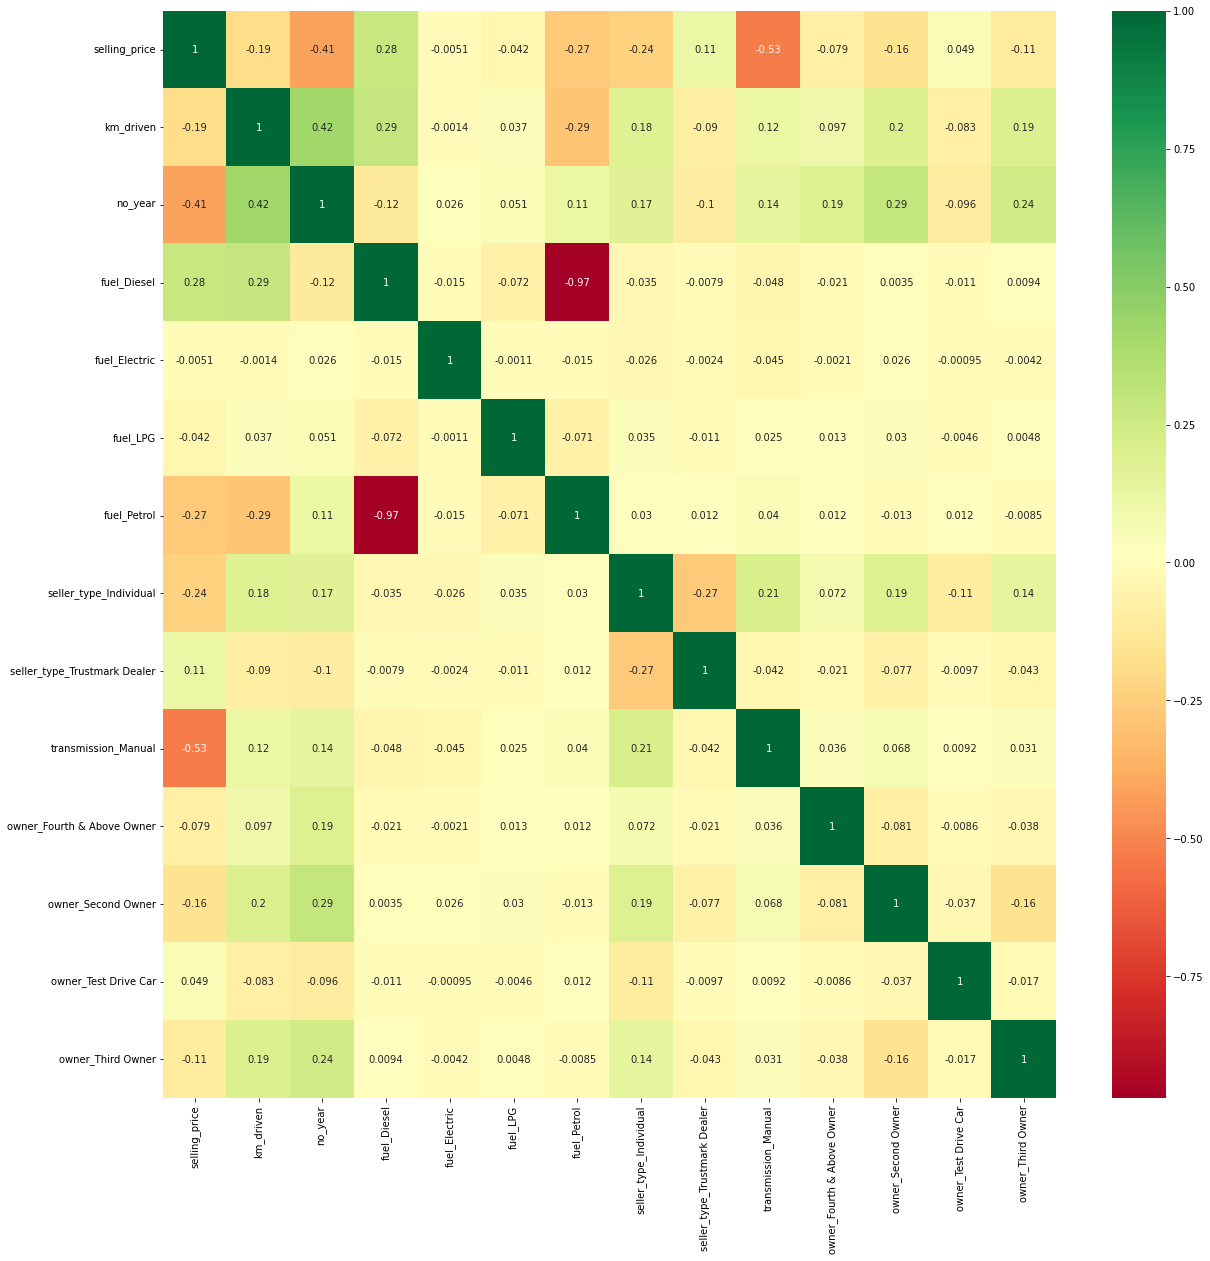

In [ ]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
#variable is corrmat
plt.figure(figsize=(20,20))
#plot the heaatmap
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
#indepent and denpendent features
#1st index take all features my dependent features
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0) 

**DECISION TREE CLASSIFIER**

In [ ]:
#decision tree classifier
#decision tree is also use fore classification and regression problem
from sklearn.tree import DecisionTreeClassifier
final_dataset = DecisionTreeClassifier(random_state = 0, max_depth = 5)
final_dataset.fit(x_train, y_train)
final_dataset.score(x_train, y_train)

0.09084924292297564

In [ ]:
predictions = final_dataset.predict(x_test)
predictions

array([550000, 550000, 500000, ..., 250000, 300000, 150000])

**ACCURACY**

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.059907834101382486

In [ ]:
x.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

**EXTRA TREE REGRESSOR**

In [ ]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
final_dataset = ExtraTreesRegressor(random_state = 0, max_depth = 5)
final_dataset.fit(x_train, y_train)
final_dataset.score(x_train, y_train)

0.6589783603287356

In [ ]:
print(model.feature_importances_)

[2.48539857e-01 2.40756757e-01 1.30586532e-01 3.41553127e-05
 2.36325102e-05 2.06007190e-04 4.92687987e-02 8.36988216e-03
 2.92827431e-01 7.92897465e-04 2.32957377e-02 6.06083565e-04
 4.69222821e-03]


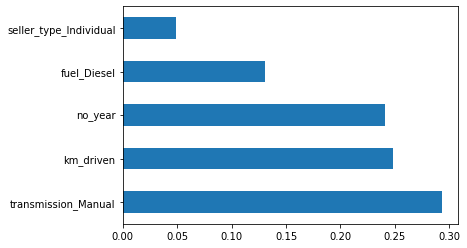

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
#x.columns is largest 5 features
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

**LINEAR REGRESSION**

In [ ]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  
r_train=regressor.score(x_train,y_train)
r_score = regressor.score(x_test,y_test)
r_train

0.44613533966075025

**R SQUARE VALUE**

In [ ]:
# R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5025071208924413

**MEAN SQUARE ERROR**

In [ ]:
#mean squared error 
from sklearn.metrics import mean_squared_error
print("Mean Squared Error")
mean_squared_error(y_test, y_pred)

Mean Squared Error


184744579007.57324

**MEAN ABSOLUTE ERROR**

In [ ]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error")
mean_absolute_error(y_test, y_pred)

Mean Absolute Error


241277.48532346886

**ROORT MEAN SQUARE ERROR**

In [ ]:
#root mean squared error
from sklearn.metrics import mean_squared_error
import numpy as np
MSE = np.square(np.subtract(y_test, y_pred)).mean() 
RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

429819.23992252076


In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([ 1.42429653e+06,  1.44563773e+06,  1.95484912e+05,  1.70185294e+06,
        3.39730707e+05,  2.25090730e+05,  1.41954406e+06,  3.26284151e+05,
        1.54992669e+06,  4.63692778e+05,  1.36103161e+05,  4.60310589e+05,
        1.32328374e+06,  6.06112906e+05,  4.82076148e+04,  6.45662537e+05,
        5.20487768e+05,  4.75325332e+05, -2.14139086e+04,  6.30490452e+05,
       -3.09344347e+05,  5.26467725e+05,  5.29440356e+05,  5.61857800e+05,
        1.18055052e+06,  1.22697502e+06,  5.46536935e+05,  6.22034979e+05,
        5.16260032e+05,  4.38183036e+05,  4.12816619e+05,  4.90893615e+05,
        5.08146686e+05,  7.26467264e+05,  2.22261423e+05,  5.91881458e+05,
        3.37276265e+05,  3.81875670e+04,  8.30183766e+04,  4.23024311e+05,
        1.25295739e+05,  6.40474221e+05,  5.29564208e+05,  1.43551063e+06,
        3.99144538e+05,  2.56662627e+05, -6.56690147e+04,  3.29523015e+05,
        5.18012252e+05,  3.21242964e+05,  6.51185597e+04,  5.12672735e+05,
        5.34513639e+05,  

In [ ]:
#train and test score
print('Train Score:',regressor.score(x_train, y_train))
print('Test Score:',regressor.score(x_test, y_test))

Train Score: 0.44613533966075025
Test Score: 0.5025071208924413


In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [ ]:
x_train

array([[ 2.26529605, -0.46107234,  1.00230681, ..., -0.59331688,
        -0.05889149, -0.27674744],
       [ 2.16054478,  0.25168063,  1.00230681, ..., -0.59331688,
        -0.05889149, -0.27674744],
       [ 0.90352958,  1.67718656, -0.9976985 , ..., -0.59331688,
        -0.05889149, -0.27674744],
       ...,
       [-0.94009271, -0.69865666, -0.9976985 , ..., -0.59331688,
        -0.05889149, -0.27674744],
       [ 0.06551945, -0.46107234,  1.00230681, ..., -0.59331688,
        -0.05889149, -0.27674744],
       [-0.10208258,  0.0140963 , -0.9976985 , ...,  1.68543999,
        -0.05889149, -0.27674744]])

In [ ]:
x_train.shape

(3472, 13)

In [ ]:
x_train

array([[ 2.26529605, -0.46107234,  1.00230681, ..., -0.59331688,
        -0.05889149, -0.27674744],
       [ 2.16054478,  0.25168063,  1.00230681, ..., -0.59331688,
        -0.05889149, -0.27674744],
       [ 0.90352958,  1.67718656, -0.9976985 , ..., -0.59331688,
        -0.05889149, -0.27674744],
       ...,
       [-0.94009271, -0.69865666, -0.9976985 , ..., -0.59331688,
        -0.05889149, -0.27674744],
       [ 0.06551945, -0.46107234,  1.00230681, ..., -0.59331688,
        -0.05889149, -0.27674744],
       [-0.10208258,  0.0140963 , -0.9976985 , ...,  1.68543999,
        -0.05889149, -0.27674744]])

In [ ]:
x_train.shape

(3472, 13)

In [ ]:
#i'm implement the random forest regressor when i using RFR don't have scale this value,if i use RFR not require decision tree
#ensemble RFR is play with hyperparametr tune also its play hyperparameter
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

**RandomForestRegressor**

In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 5)
rf.fit(x_train , y_train)
rf.score(x_train , y_train)
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.6604821505664935

**LASSO REGRESSION**

In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso
l = Lasso()
l.fit(x_train, y_train)

In [ ]:
#train score
x_train_pred_l = l.predict(x_train)
r2_score(y_train, x_train_pred_l)

0.44613533954122186

In [ ]:
#test score
x_test_pred_l = l.predict(x_test)
r2_score(y_test, x_test_pred_l)

0.5025068603813865

**RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
rR = Ridge()
rR.fit(x_train, y_train)

Ridge()

In [ ]:
#train score
x_train_pred_rR = rR.predict(x_train)
r2_score(y_train ,x_train_pred_rR)

0.4461351758562353

In [ ]:
#test score
x_test_pred_rR = rR.predict(x_test)
r2_score(y_test, x_test_pred_rR)

0.5024883421813615

**HYPERPARAMETR**

In [ ]:
#hyperparametors,n_estimators-> diff values of 100
#n_estimators id diff diff decision tree values
#just i'm gonna create list comprehensionn (int(x))
import numpy as np
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#im goona select diff diff decision tree values,100 to till 1200 this basically diff parameters
print(n_estimators)
#in o/p im selescted diff desion tree for my  hyper parameters 

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


**RANDAMIZED CV**

In [ ]:
#randamized search CV

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#number of features to consider of every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tress
#max_depth i'm selected b/w 5 to 30 
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#mimnimum number of samples requried to split node,randomly selected
min_samples_split = [2, 5, 10 ,15, 100]
#minimum number of samples requried at each leaf node
min_samples_leaf = [1,2, 5, 10]

In [ ]:
#hyperparameter tuning use randomized cv helps to find best parametrs of RCV pretty much fast
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#create random grid
#grid cv also we can use but RCV is little bit faster,once i execute  this various parameter i taken RCV select best parameter
random_grid = {'n_estimators': n_estimators,#take a key values,  
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
#use the random grid to search for the best hyperparameters
#first create the base model to tune
rf = RandomForestRegressor()#rf is a parameter value,2nd values asssingned is random_grid

In [ ]:
#if i remove verbose o/p value won't get ,n_jobs -> how cores we used
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid , n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [ ]:
predictions = rf_random.predict(x_test)

In [ ]:
predictions

array([1114823.41937252, 1463984.46986094,  240232.15053089,
       3811570.850658  ,  242840.14678442,  183543.36841801,
        867532.5228033 ,  308443.51452995, 1335148.83065094,
        450051.94625918,  265972.93775465,  425328.52464914,
        689982.03313187,  546997.12465486,  169932.33039782,
        675950.61150664,  480962.57893176,  275556.60779571,
        115134.93547364,  568664.11965954,   94700.63325567,
        510301.68349159,  404836.38028637,  438709.74601253,
        864559.5577499 ,  651977.08317837,  616393.75812738,
        515788.8728702 ,  574536.10116671,  421536.78802257,
        393270.49936128,  475628.95525017,  442120.1278287 ,
        751465.99728883,  299829.47104646,  454955.47678036,
        334880.6904436 ,  111370.52920097,  230698.07403098,
        393823.43327281,  197357.8021863 ,  531139.44589878,
        581716.32008014, 1761490.71170812,  428665.56627886,
        270462.49946918,  120864.56378171,  381830.64731717,
        538366.970712  ,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


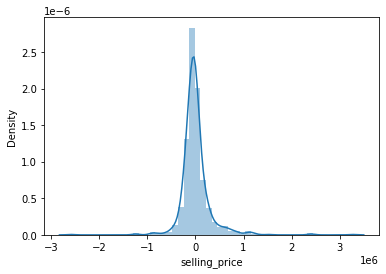

In [ ]:
#y_test id real value and x_test is prediction values
#my graph looks like a normal distributions 
sns.distplot(y_test-predictions)
#we did a prediction based on x_test,y_test(real value)
#i found out the diff b/w y-test and predictions iy should be a minimul,density minimul so we get closed garition distribution graph the diff VV minimul

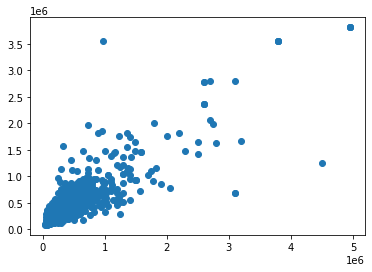

In [ ]:
plt.scatter(y_test,predictions)
#plot is linarly avaible,my prediction is pretty much good 